In [1]:

import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
import cv2 
import os 

# Auto Encoders with Convolutional Neural Networks

In [2]:
epochs = 50
bs = 100
lr = 0.001

In [3]:
### Loading Data
(x_train, ytrain), (x_test, ytest) = cifar10.load_data()
### Normalize Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, UpSampling2D
from tensorflow.keras import Input
from tensorflow.keras import Model
### Encoder
inputs = Input((32,32, 3))
x = Conv2D(filters = 256, kernel_size = (3,3),activation = 'relu', padding = 'same')(inputs)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

### Encoding
encoded = MaxPooling2D(pool_size = (2,2))(x)

### Decoder
x = Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(filters = 256, kernel_size = (3,3),activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, kernel_size = (3,3),activation = 'relu', padding = 'same')(x)
### Model 
autoencoder = Model(inputs = inputs, outputs = decoded)
code = Model(inputs=inputs, outputs=encoded)

In [10]:
print("The shape of the input image: ", inputs.shape)
print("The shape of the encoded Vector is: ", encoded.shape)
print("The shape of generated image is: ", decoded.shape)

The shape of the input image:  (None, 32, 32, 3)
The shape of the encoded Vector is:  (None, 2, 2, 128)
The shape of generated image is:  (None, 32, 32, 3)


In [11]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = "binary_crossentropy",)
history = autoencoder.fit(x_train, x_train, epochs = epochs, batch_size = bs, 
                          validation_data=(x_test,x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 39s 774us/sample - loss: 0.6330 - val_loss: 0.5892
Epoch 2/50
50000/50000 [==============================] - 39s 781us/sample - loss: 0.5926 - val_loss: 0.5912
Epoch 3/50
50000/50000 [==============================] - 40s 806us/sample - loss: 0.5857 - val_loss: 0.5841
Epoch 4/50
50000/50000 [==============================] - 43s 859us/sample - loss: 0.5880 - val_loss: 0.5871
Epoch 5/50
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.5891 - val_loss: 0.5816
Epoch 6/50
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.5806 - val_loss: 0.5823
Epoch 7/50
50000/50000 [==============================] - 81s 2ms/sample - loss: 0.5771 - val_loss: 0.5766
Epoch 8/50
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.5784 - val_loss: 0.5749
Epoch 9/50
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.578

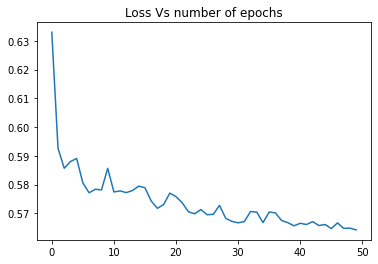

In [20]:
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'])
plt.title("Loss Vs number of epochs")
plt.show()

# Generated Images 

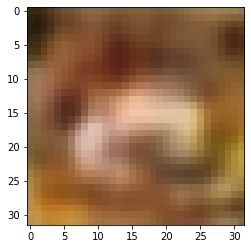

In [12]:
gen = autoencoder.predict(np.expand_dims(x_train[0], axis = 0))
plt.imshow(gen.reshape(32,32,3))

# Original Image

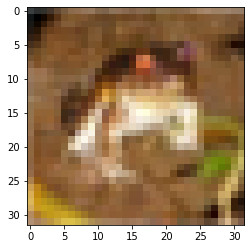

In [13]:
plt.imshow(x_train[0])